<a href="https://colab.research.google.com/github/shahrzadJavadiKoushesh/Process-Outcome-Prediction-BachelorProject/blob/main/ProcessMiningHealthData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pm4py pandas scikit-learn xgboost matplotlib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.4 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=dc09534bccf4ce297ff512c63efd8dbc81ad66040f521607f47c80cb7674f088
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [ ]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


In [ ]:
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

log = pm4py.read_xes('drive/MyDrive/ProcessMiningBachelorProject/dataset/activitylog_uci_detailed_labour.xes.gz')

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions

parsing log, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
print(log)

     concept:name lifecycle:transition      time:timestamp    Column_4  \
0           Start                start 2012-11-12 00:48:38       Start   
1           Start             complete 2012-11-12 00:48:38       Start   
2         washing                start 2012-11-12 00:48:38     washing   
3         washing             complete 2012-11-12 00:50:12     washing   
4      watchingtv                start 2012-11-12 00:50:29  watchingtv   
...           ...                  ...                 ...         ...   
1387      washing             complete 2011-12-09 21:04:50     washing   
1388   watchingtv                start 2011-12-09 21:04:59  watchingtv   
1389   watchingtv             complete 2011-12-10 00:16:21  watchingtv   
1390          End                start 2011-12-10 00:16:21         End   
1391          End             complete 2011-12-10 00:16:21         End   

     case:concept:name    case:creator  
0                   21  Fluxicon Disco  
1                   21  Fluxi

In [ ]:
# Check the unique activities in the log
unique_activities = log['concept:name'].unique()
print("Unique activities:", unique_activities)

Unique activities: ['Start' 'washing' 'watchingtv' 'toilet' 'sleeping' 'prepareBreakfast'
 'eatingBreakfast' 'shower' 'grooming' 'snack' 'prepareLunch'
 'eatingLunch' 'outdoors' 'prepareDinner' 'eatingDinner' 'End']


Duration of tasks

In [ ]:
import pandas as pd

log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])

data = []

# Loop through the dataframe in pairs (start and complete)
for i in range(0, len(log) - 1, 2):
    # Extract current and next events
    start_event = log.iloc[i]
    complete_event = log.iloc[i + 1]

    if (start_event['concept:name'] == complete_event['concept:name']) and (start_event['lifecycle:transition'] == 'start') and (complete_event['lifecycle:transition'] == 'complete'):
        # Calculate duration
        duration = (complete_event['time:timestamp'] - start_event['time:timestamp']).total_seconds()

        # Store the result
        data.append({
            'case:concept:name': start_event['case:concept:name'],
            'activity': start_event['concept:name'],
            'start_time': start_event['time:timestamp'],
            'complete_time': complete_event['time:timestamp'],
            'duration': duration
        })

# Convert the results into a DataFrame for analysis
df_duration = pd.DataFrame(data)

df_duration


,case:concept:name,activity,start_time,complete_time,duration
0,21,Start,2012-11-12 00:48:38,2012-11-12 00:48:38,0.0
1,21,washing,2012-11-12 00:48:38,2012-11-12 00:50:12,94.0
2,21,watchingtv,2012-11-12 00:50:29,2012-11-12 01:52:12,3703.0
3,21,toilet,2012-11-12 01:53:19,2012-11-12 01:53:22,3.0
4,21,washing,2012-11-12 01:53:27,2012-11-12 01:53:35,8.0
...,...,...,...,...,...
601,122,outdoors,2011-12-09 18:32:02,2011-12-09 18:50:45,1123.0
602,122,watchingtv,2011-12-09 19:19:54,2011-12-09 21:04:31,6277.0
603,122,washing,2011-12-09 21:04:37,2011-12-09 21:04:50,13.0
604,122,watchingtv,2011-12-09 21:04:59,2011-12-10 00:16:21,11482.0


<Figure size 1500x1000 with 0 Axes>

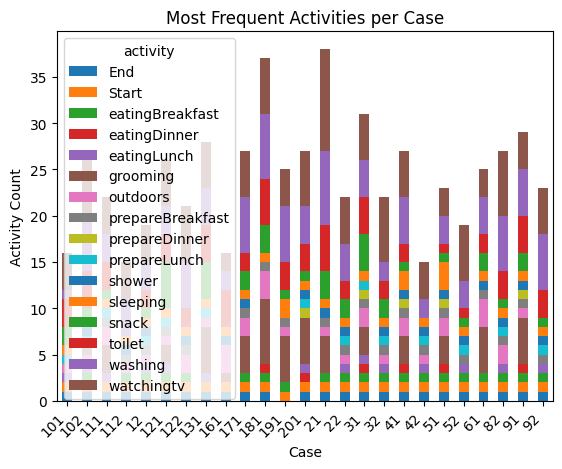

In [ ]:
# @title Most Frequent Activities per Case

import matplotlib.pyplot as plt
import pandas as pd

activity_counts = df_duration.groupby(['case:concept:name', 'activity'])['activity'].count().unstack()

plt.figure(figsize=(15, 10))
activity_counts.plot(kind='bar', stacked=True)
plt.title('Most Frequent Activities per Case')
plt.xlabel('Case')
plt.ylabel('Activity Count')
_ = plt.xticks(rotation=45, ha='right')

In [ ]:
# Group by case and calculate total duration, mean duration, max duration, and min duration per case
features = df_duration.groupby('case:concept:name').agg(
    total_duration=('duration', 'sum'),
    mean_duration=('duration', 'mean'),
    max_duration=('duration', 'max'),
    min_duration=('duration', 'min')
).reset_index()

# Count the frequency of each activity per case
activity_counts = pd.crosstab(df_duration['case:concept:name'], df_duration['activity'])

# Merge the duration-based features with the activity counts
df_features = pd.merge(features, activity_counts, on='case:concept:name')

df_features


,case:concept:name,total_duration,mean_duration,max_duration,min_duration,End,Start,eatingBreakfast,eatingDinner,eatingLunch,...,outdoors,prepareBreakfast,prepareDinner,prepareLunch,shower,sleeping,snack,toilet,washing,watchingtv
0,101,78540.0,4908.750000,31839.0,0.0,1,1,0,0,1,...,1,0,0,1,0,1,2,3,1,4
1,102,86737.0,3336.038462,35144.0,0.0,1,1,1,0,1,...,1,1,0,1,1,1,1,4,6,6
2,111,74109.0,3368.590909,34857.0,0.0,1,1,0,0,1,...,2,1,0,1,0,1,1,3,3,4
3,112,81803.0,5453.533333,34488.0,0.0,1,1,1,0,0,...,1,1,0,0,1,1,0,0,4,4
4,12,83251.0,4381.631579,28212.0,0.0,1,1,1,0,1,...,1,1,0,1,1,1,1,2,3,4
5,121,79220.0,3046.923077,29772.0,0.0,1,1,1,0,1,...,1,1,0,1,0,1,5,3,3,5
6,122,78455.0,3735.952381,34345.0,0.0,1,1,1,0,0,...,2,1,0,0,1,1,0,2,5,6
7,131,47305.0,1689.464286,7826.0,0.0,1,1,0,0,1,...,1,0,0,1,0,1,4,4,4,5
8,161,78069.0,4879.312500,26182.0,0.0,1,1,0,0,0,...,3,0,0,0,1,1,0,4,2,2
9,171,79955.0,2961.296296,30554.0,0.0,1,1,1,0,0,...,2,1,0,0,1,1,2,2,6,5


In [ ]:
# Filter physical activities in the dataset
physical_activities = ['grooming', 'washing', 'toilet', 'shower', 'outdoors']
df_physical = df_duration[df_duration['activity'].isin(physical_activities)]

# Group by individual (case) and day to get daily metrics
daily_metrics = df_physical.groupby('case:concept:name').agg(
    total_physical_duration=('duration', 'sum'),
    physical_activity_count=('activity', 'count')
).reset_index()

# calculated metrics for each individual
daily_metrics


,case:concept:name,total_physical_duration,physical_activity_count
0,101,17681.0,5
1,102,8057.0,12
2,111,3730.0,11
3,112,8248.0,6
4,12,2344.0,7
5,121,13497.0,9
6,122,15801.0,10
7,131,10458.0,14
8,161,41480.0,11
9,171,24340.0,15


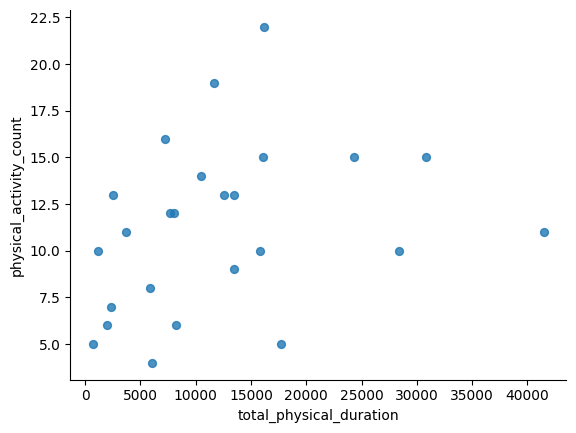

In [ ]:
# @title total_physical_duration vs physical_activity_count
from matplotlib import pyplot as plt
daily_metrics.plot(kind='scatter', x='total_physical_duration', y='physical_activity_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Display basic statistics to understand distribution
print(daily_metrics[['total_physical_duration', 'physical_activity_count']].describe())

       total_physical_duration  physical_activity_count
count                25.000000                25.000000
mean              12317.480000                11.240000
std               10148.554495                 4.484046
min                 676.000000                 4.000000
25%                5851.000000                 8.000000
50%               10458.000000                11.000000
75%               16081.000000                14.000000
max               41480.000000                22.000000


Assuming a typical distribution, here are some general rules:

*   Low activity: Below the 33rd percentile (for both duration and count).
*   Moderate activity: Between the 33rd and 66th percentiles.
*   High activity: Above the 66th percentile.








In [ ]:
# Define thresholds based on percentiles
duration_thresholds = daily_metrics['total_physical_duration'].quantile([0.33, 0.66]).values
count_thresholds = daily_metrics['physical_activity_count'].quantile([0.33, 0.66]).values

# Define activity level based on duration and count
def classify_activity_level(row):
    if row['total_physical_duration'] <= duration_thresholds[0] and row['physical_activity_count'] <= count_thresholds[0]:
        return 'low'
    elif row['total_physical_duration'] <= duration_thresholds[1] and row['physical_activity_count'] <= count_thresholds[1]:
        return 'moderate'
    else:
        return 'high'

# Apply the classification function
daily_metrics['activity_level'] = daily_metrics.apply(classify_activity_level, axis=1)

# Display the DataFrame with activity levels
daily_metrics[['case:concept:name', 'total_physical_duration', 'physical_activity_count', 'activity_level']]

# Merge the physical activity level from daily_metrics into df_physical
df_physical = df_physical.merge(
    daily_metrics[['case:concept:name', 'activity_level']],
    on='case:concept:name',
    how='left'
)


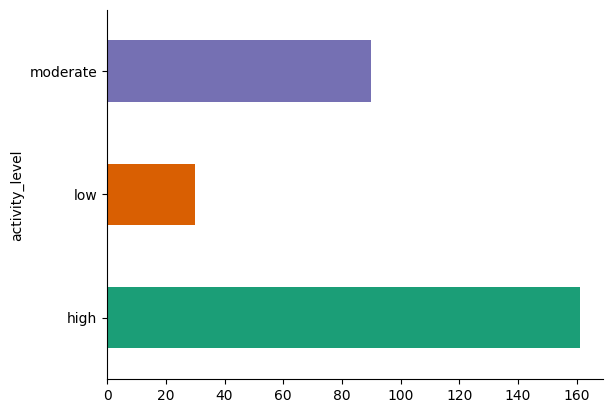

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_physical.groupby('activity_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

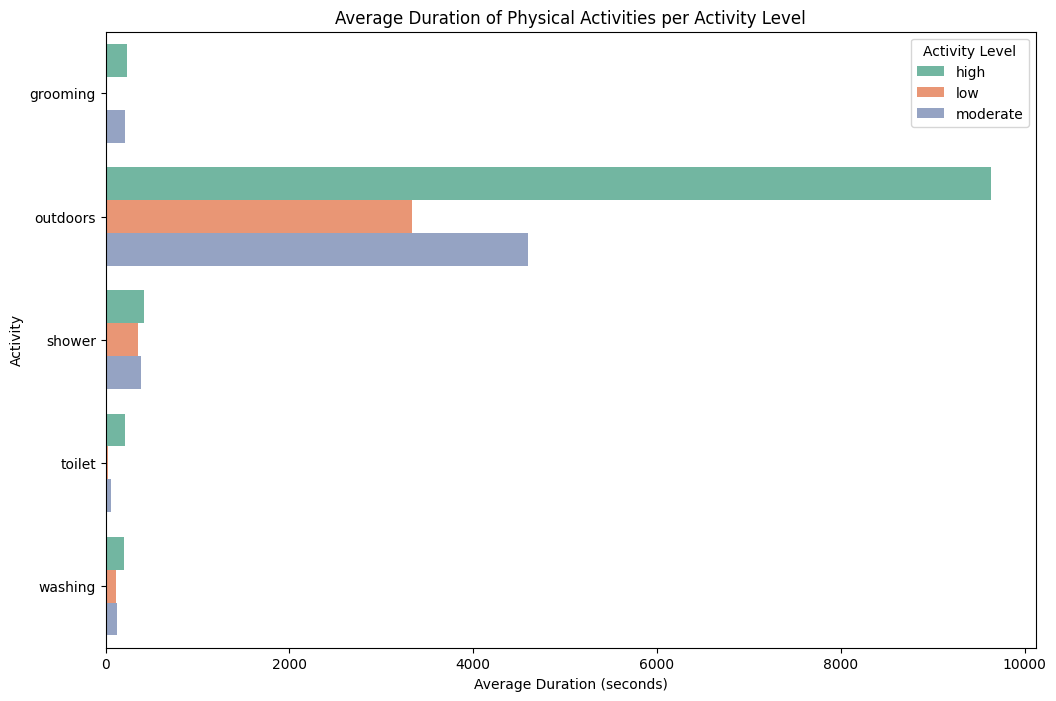

In [ ]:
# Group data by physical activity level and activity type
activity_patterns = df_physical.groupby(['activity_level', 'activity']).agg(
    avg_duration=('duration', 'mean'),
    total_duration=('duration', 'sum'),
    count=('activity', 'count')
).reset_index()

# Visualize the average duration of each activity within each physical activity level
plt.figure(figsize=(12, 8))
sns.barplot(data=activity_patterns, x='avg_duration', y='activity', hue='activity_level', palette='Set2')
plt.title("Average Duration of Physical Activities per Activity Level")
plt.xlabel("Average Duration (seconds)")
plt.ylabel("Activity")
plt.legend(title="Activity Level")
plt.show()


<ipython-input-19-82043314b7c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_routine_times, x='activity_level', y=(daily_routine_times['end_time'] - daily_routine_times['start_time']).dt.total_seconds()/3600, palette='Set3')


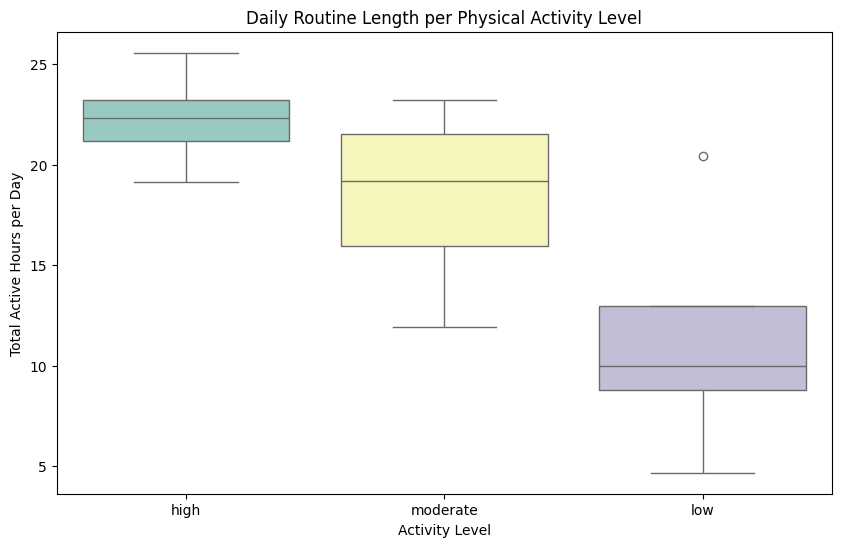

In [ ]:
# Calculate the start and end times of daily routines for each activity level
daily_routine_times = df_physical.groupby(['case:concept:name', 'activity_level']).agg(
    start_time=('start_time', 'min'),
    end_time=('complete_time', 'max')
).reset_index()

# Visualize daily routine times
plt.figure(figsize=(10, 6))
sns.boxplot(data=daily_routine_times, x='activity_level', y=(daily_routine_times['end_time'] - daily_routine_times['start_time']).dt.total_seconds()/3600, palette='Set3')
plt.xlabel("Activity Level")
plt.ylabel("Total Active Hours per Day")
plt.title("Daily Routine Length per Physical Activity Level")
plt.show()


### Model

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = daily_metrics.drop(columns=['case:concept:name', 'activity_level'])
y = daily_metrics['activity_level']

# Encode the target variable (using one-hot encoding or label encoding)
y_encoded = y.map({'low': 0, 'moderate': 1, 'high': 2})

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Random Forst


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, rf_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.67      0.58      0.62         5
weighted avg       1.00      0.80      0.89         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost

In [ ]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, xgb_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.67      0.58      0.62         5
weighted avg       1.00      0.80      0.89         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       1.00      0.75      0.86         4

    accuracy                           0.60         5
   macro avg       0.33      0.25      0.29         5
weighted avg       0.80      0.60      0.69         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Model Evaluation

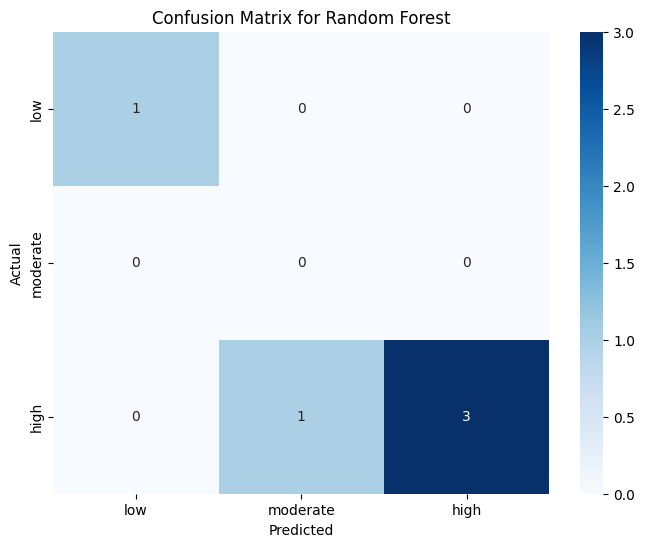

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'moderate', 'high'], yticklabels=['low', 'moderate', 'high'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
import numpy as np

# For Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. Feature 0 (0.5164424365600364)
2. Feature 1 (0.48355756343996353)
